# Final Report
## Team_56: Educational Success Factors 

### Team Members:
- Monisha Kapadia (kapadia.mo@northeastern.edu)
- Alyssa Benjamin (benjamin.al@northeastern.edu)
- Yi Chen Wu (chenwu.yi@northeastern.edu)
- Anh Nguyen (nguyen.anh9@northeastern.edu)

## Executive Summary
This report focuses on how certain characteristics and habits of student may or may not influence a student's grades. Utilizing a dataset outlining a variety of personal, educational, and familial features of a student along with their final grade ranked from 0-7, our objective is to create a predictiative model for student grades.  With this data in mind, we were able to tackle the following overarching research questions: as students, are our grades in our own control, (or are they predetermined by our circumstances i.e. gender) and which group of categories is most influential on a student’s grade (options: personal, educational, or familial). The machine learning programs applied to the data included a a random forest regressor to understand which features are most important in determining a student's grade and k-nearest neighbor classifiers to determine which category of features bears the most influence on grades by comparing accuracy of the classifier. 



## Ethical Considerations
Due to the personal nature of our data, our findings may propagate certain preconceived biases. For instance, gender and age are examined as factors that play a role in a student’s grade. The sample size of the data is very limited and as such, any patterns constructed from the process should not be used to make overarching assumptions about entire groups of people and their educational potential. Additionally, the factors the data reports on are not as comprehensive as the multitude of factors that are at play in real life. Therefore, the findings in this report is merely an exercise of ML and is a true depiction of its shortcomings in understanding human behavior. 



## Introduction
As students, the pressure to achieve, particularly for grades, is immense. In fact, over 75% of high school students in a [survey](https://www.ascd.org/el/articles/taking-the-stress-out-of-grading) reported they always or often worry about not getting good grades. That stress often follows students into pursuits of higher education, especially when worrying about GPA and possible job prospects. The usual advice received is to study hard and to pay attention. However, [studies](https://www.brookings.edu/articles/unequal-opportunity-race-and-education/) have shown that those at historical disadvantages, whether in terms of race, class or gender, struggle with achieving at higher grades from simply their circumstances. With this conflicting information, our team aims to evaluate, based on a sample representative of college students reporting on a variety of personal, educational, and familial factors, which factors bear an influence on our grades with machine learning and visualization tools. 


## Data

Dataset: https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation

### Overview:
This dataset is a sample representative from 145 student in 2019 in the Faculty of Engineering and Faculty of Educational Sciences at the Near East University in Cyprus. Students were give a questionnaire that consists totally 30 questions
in 3 categories: Personal Questions, Family Questions, and Educational Preferences.

The characteristics collected for each student includes:

1. Student Age (1: 18-21, 2: 22-25, 3: above 26)
2. Gender: (1: female, 2: male)
3. What type of high school they graduated from: (1: private, 2: state, 3: other)
4. Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
5. Having additional work after school: (1: Yes, 2: No)
6. If they participate in regular artistic or sports activity: (1: Yes, 2: No)
7. If the student has a romantic partner: (1: Yes, 2: No)
8. Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
9. Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
10. Accommodation type in where studying: (1: rental, 2: dormitory, 3: with family, 4: Other)
11. Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
12. Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13. Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
14. Parental status: (1: married, 2: divorced, 3: died - one of them or both) 
15. Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
16. Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
17. Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
18. How frequently they read non-scientific books/journals: (1: None, 2: Sometimes, 3: Often)
19. Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20. If they attended the seminars/conferences related to the department: (1: Yes, 2: No)
21. Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
22. Attendance to classes (1: always, 2: sometimes, 3: never)
23. How was preparation done for midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
24. How much preparation was done for midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
25. If they take notes in classes: (1: never, 2: sometimes, 3: always)
26. If they listen in classes: (1: never, 2: sometimes, 3: always)
27. Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
28. If they thought flip-classroom was utilized in their couse: (1: not useful, 2: useful, 3: not applicable)
29. Cumulative GPA in the last semester (out of /4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
30. Expected Cumulative GPA when graduating (out of /4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31. Final Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from copy import copy
import plotly.express as px

### Data Processing Pipeline
The data set did not contain null values and was easily accesible from a csv file, so manual cleaning was not necessary. Additonally, with only one the dataset there was no merging necessary

Step 1: Load in data from csv

Step 2: Create a DataFrame from the data, with the column names reflecting the csv’s column names and the consequent rows reflecting the data from the csv’s rows (each row representing a student). The index should be manually set to STUDENTID for ease of indexing for further data analysis.

Step 3: rewrite column name from "KIDS" to "P_STATUS" since kaggle creator accidentally wrote kids instead of parental status for that column of data


In [2]:
# read in csv file as dataframe
df_students = pd.read_csv('student_prediction.csv', index_col = 'STUDENTID' )

#rewrite column name from kids to parental status
df_students.rename(columns = {'KIDS':'P_STATUS'}, inplace = True)

# fix ordinal ranking for attendance column
attend = df_students['ATTEND']
for idx, val in attend.items():
    if val == 1:
        attend[idx] = 3
    elif val == 3:
        attend[idx] = 1
        
# fix ordinal ranking for midterm preparation
midterm = df_students['PREP_EXAM']
for idx, val in midterm.items():
    if val == 1:
        midterm[idx] = 2
    elif val == 3:
        midterm[idx] = 1
    elif val == 2:
        midterm[idx] = 3
        
# drop columns w/ non applicable entries - prevent accuracy in predictative model
# consider drpping non applicable or other columns 
# df_students.drop(columns= [''])               
        
df_students.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,GRADE
STUDENTID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,3,1,2,3,2,1,2,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,3,1,2,3,2,3,2,2,3,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,3,1,2,2,2,1,1,2,2,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,3,1,3,3,2,2,1,3,2,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,3,2,2,2,2,2,1,2,2,1


## Visualizations

### Correlation HeatMap
To gauge a general understanding of how closely related a student's various features were related to their grade, we choose to calculate and depict the correlations of each column of data to the grade column. Correlation was chosen as the best method for detecting similar change in data between two varaibles as opposed to other tools (such as covariance) because correlation is unaffected by difference in scale of the two varaibles. This is important because some features being explored are binary and represented only as 1 or 2 while grade is represented by whole numbers 0-7. The coieffcients calculated can range from +1 to -1 with the sign of the coieffcient indicating whether the relationship of the two varaibles is negative (inverse) or positive and the strength of the relationship is indicating by the absolute value of the coieffcient. 

In [55]:
# create new datafram the drops columns that aren't ordinally ranked or binary
df_ord_bin = df_students.drop(columns= ['HS_TYPE', 'TRANSPORT', 'MOTHER_JOB', 'FATHER_JOB', 'P_STATUS', 'LIVING', 'IMPACT', 'CLASSROOM'])

Text(0.5, 1.0, 'Correlation Heatmap between Grade & Student Charactertistics')

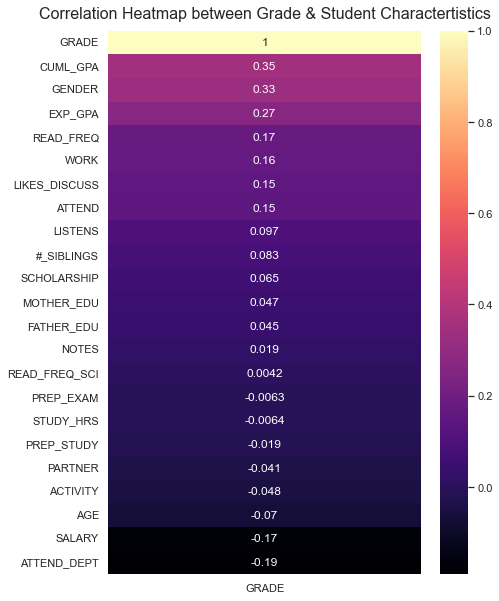

In [54]:
# calculate correlation between students grade and every other column
corr = df_ord_bin.corr(method = 'spearman')[['GRADE']]

# order values of correlation in ascending order
corr = corr.sort_values(by='GRADE', ascending=False)

# plot heatmap 
corr_hp = sns.heatmap(corr, annot=True, cmap='magma', yticklabels = corr.index)

# increase size of plot
plt.gcf().set_size_inches(7, 10)

# set title 
corr_hp.set_title("Correlation Heatmap between Grade & Student Charactertistics", fontdict={'fontsize':16}, pad=12)

To properly intepret these results, columns that did not have ordinal or binary data were dropped (such as mother and father's job) because the method of correlation being utilized was specifically tailored for ordinal data. Those increases or decreases in those columns of data had no real ranking. As such, the correlation calculated would have no significant meaning for those features. 

Visually, the top 5 strongest relationships of features with grade depicted were cumulative gpa, gender, expected gpa, attendance of department related events, and reading frequency. As a student's grade increased, their cumulative and expected gpa and reading frequency increased. Gender is a binary variable but the relationship between grade and gender can be intepreted as the grade increases, the more likely the student is going to be male as an "increase" in gender means the gender is represeted by the higher value, 2, which indicates the student is male. Attendance of department related events of students had an inverse relationship with grade meaning, with higher attendance of these events, a student's grade decreased. Some features that had the least correlation to grade includeda students' frequency of reading scientific journals, a student's frequency of taking notes, and the length of their preparation for the midterm exam. 

These correlations are good indicators of demonstrating which features will bear importance in our further ML application as we attempt to create a predictative model and also serve as the basis of the next visualizations. 

### Histogram of Important Characteristics
Using the correlation heatmap to help guide our areas of focus, we choose to further explore the distribution of gender and cumulative gpa as these features demonstrated the strongest correlation with the grade column. These histograms will try to depict the effect of these features based on the highest and lowest grades recieved in the class (0 and 7).

#### Gender Exploration

Text(0.5, 0.98, 'Gender Distribution with Minimum & Maximum Grades')

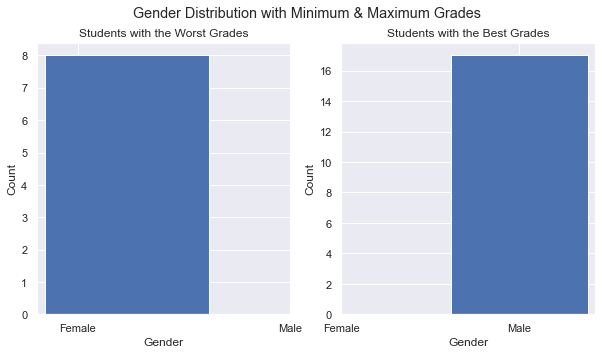

In [66]:
# set seaborn theme
sns.set()

# create subplot base
fig, ax = plt.subplots(1, 2)

# list of grade rankings of focus (max and min scores)
grade_lst = [0, 7] 

for i in range(len(grade_lst)):
    
    # create new space for each subplot
    plt.sca(ax[i])
    
    # boolean index for grade to be the best and worst ones
    s_bool = df_students.loc[:, "GRADE"] == grade_lst[i]
    df_grade = df_students.loc[s_bool, :]

    # slice for only gender col & plot histogram 
    df_gender = df_grade["GENDER"]
    plt.hist(df_gender, bins = 1)

    # set subplot title 
    if grade_lst[i] == 0:
        plt.title("Students with the Worst Grades")
    elif grade_lst[i] == 7: 
         plt.title("Students with the Best Grades")
            
    # create x & y label/set x-ticks to proper labels
    plt.xticks([.7, 2], ["Female", "Male"])
    plt.xlabel("Gender")
    plt.ylabel("Count")
 
# adjust plot size/subplot spacing/set title 
plt.gcf().set_size_inches(10, 5)
plt.suptitle("Gender Distribution with Minimum & Maximum Grades")


Since gender was one of the more highly correlated features to a student's grade, demonstrated by the heatmap, the histogram explores how that correlation was determined from the dataset. Gender is a personal feature about a student which speaks back to our one of our questions of whether or not our grades are controlled by our actions or perhaps its predetermined by our identity. Visually, these histograms depict as male students being the only students to achieve the highest grade (ranked as 7) and female students as the only ones to fail (ranked as 0). This, once again, is based on a very small representative sample size and these findings cannot be applied to make claims about an overall group of people. These histograms better explain the higher correlation with gender and grade since the the maximum and minimum grades have one-sided data.

#### Cumulative GPA

Text(0.5, 0.98, 'Cumulative GPA Distribution with Minimum & Maximum Grades')

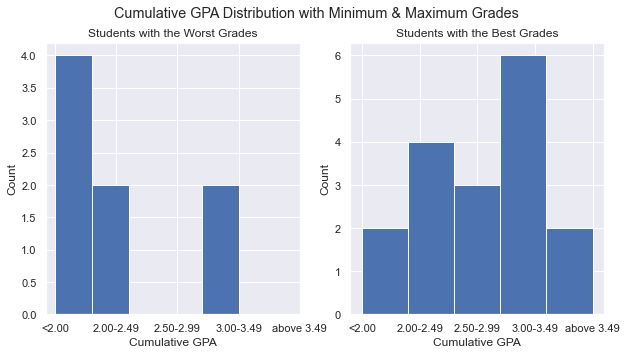

In [61]:
# set seaborn theme
sns.set()

# create subplot base
fig, ax = plt.subplots(1, 2)

# list of grade rankings of focus (max and min scores)
grade_lst = [0, 7] 

for i in range(len(grade_lst)):
    
    # create new space for each subplot
    plt.sca(ax[i])
    
    # boolean index for grade to be the best and worst ones
    s_bool = df_students.loc[:, "GRADE"] == grade_lst[i]
    df_grade = df_students.loc[s_bool, :]

    # slice for only cuml_gpa col & plot histogram 
    df_cmgpa = df_grade["CUML_GPA"]
    plt.hist(df_cmgpa, bins = 5)

    # set subplot title 
    if grade_lst[i] == 0:
        plt.title("Students with the Worst Grades")
    elif grade_lst[i] == 7: 
         plt.title("Students with the Best Grades")
            
    # create x & y label/set x-ticks to proper labels
    plt.xticks([1, 2, 3, 4, 5], ['<2.00', '2.00-2.49', '2.50-2.99', '3.00-3.49', 'above 3.49'])
    plt.xlabel("Cumulative GPA")
    plt.ylabel("Count")
    
# adjust plot size/set title 
plt.gcf().set_size_inches(10, 5)
plt.suptitle("Cumulative GPA Distribution with Minimum & Maximum Grades")


The most highly correlated feature with a student's grade was a student's cumulative gpa, which better propels the argument that previouse education prowess will better improve a student's ability to get higher grades. Looking at the students with failing grades, the majority of those students had the lowest gpas (lower than 2.00). Conversely, the students with highest grades were more likely to have higher gpas with the highest concentration of students with gpas between 3.00-3.49. Understanding this relationship will serve as the basis of the theory that a student's grade may have more undue influence from educational factors than personal or familial. 

### PCA Map
With an extensive amount of x features of this data, it is hard to capture the entirety of features in visualization. For this reason, we decided to employ the use of principal component analysis to scatter the entirety of the data to better capture if there is emerging trends between grade and points of similar principal components. We compressed x features into two components in order to the scatter data with two dimensions and the color assigned to each point (student) is based on the grade they earned.

In [43]:
# copy df_students to store pca values
df_pca = copy(df_students)

# extract relevant x values
x_feat_list = df_pca.columns[:-1]
x = df_pca.loc[:, x_feat_list].values

# compress
pca = PCA(n_components=2, whiten=True)
x_compress = pca.fit_transform(x)

# add features back into dataframe (for plotting)
df_pca['pca0'] = x_compress[:, 0]
df_pca['pca1'] = x_compress[:, 1]

# scatter plot
fig = px.scatter(df_pca, x='pca0', y='pca1', hover_data=df_pca.columns, color='GRADE')
fig.show()

The purpose of this graph is to discern if there are obvious groupings of the points to examine whether the features of a student in this dataset have an effect on its grade. Through pca scatter plots, points with similar features (in this case: age, gender, study habits etc.) will often group together due to the compression of the features into pca components. If a student's features help determine what grade a student earned, the points of the same color would group together because students with similar features would have earned the same grade. However, based on this visualization, the opposite is seen. The points of the same color (students with the same grade) are scattered in no defined groups. This leads us to believe that our intial expectation for student features to effect grades is not as accurate as we once believed. 

## Methods 
The mostly ordinal and discrete nature of this dataset guided us to approach our predictative model with the following machine learning tools. To try and accurately predict student grades, we split our approach with two seperate machine learning

### RandomForestRegressor
With discrete data, typical regression methods (linear, polynomial etc.) are not feasible. As such, we decided on applying random forest regression to our data instead. Random forest regression allows for a mutlitude of decision tree regressors to be built to further understand which features have a stronger relationship to what the regressor is outputting. In this case, the regressor will be outputting grades. This method allows to properly weight our samples since they are uneven and prevent overfitting that commonly occurs with just one decision tree regressor. A limitation of this method is that the grade it output will be continous which differs from the supervised feature (Grade) as it is discrete data. As such, the percieved accuracy of the randomforestregressor will be lower the 


feature importance 



good b/c it takes into account the numerical difference in grades (what k-NN doesn't do)
Pitfalls: nonrounded, low r2 score because its continous




k-NN Classifier
The best suited ML option for predicting discrete data at our disposal we determined was the k-NN classifier. Particularly, we were interested in a method that would be supervised so there would be output predictions based on the patterns discerned from data, which is the basis of our project goal. The k-NN classifier will be split up into three different segmentations of the data, and then with one overall classifier with all input functions. The three segmentations will be based on the category of questions the data focuses on: familial, personal, or educational matters. This will be in order to determine which category of data plays the biggest role in better predicting a student's grade. Each classsifier will be cross validated as the basis of our predictative model is to be able to determine a new student's grade. The classifiers will also be scale normalized to take into account the various different ordinal scales utilized throughout the dataset. 

Pitfalls: a classifier when calculating accuracy and interpreting the effectiveness of the predictions does not take into account the difference in grades. For instance, the classifier would consider mistakenly classifying a student who was in the highest rank of grades (7) as someone who received the next rank of grades (6) the same gravity of mistake as classifying that same person as someone who received the lowest rank of grades (1). This will make the accuracy of the classifier appear better than something like a regressor. Another pitfall will be that this method has no way of proprly weight our samples based on their sample size which will cause higher accuracy in predicting grades of class with more samples. 

### Random Forest Regressor  

Before intializing the regressor, we want to better balance our regressor by accomodating for our data's uneven sample size for each grade.

In [121]:
df_students['GRADE'].value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64

There are clearly many more samples for the students that got a grade of 1 as opposed to the number samples for students that got a grade of 0. With random forest regressor's smaple_weight parameter, we are able to assign weights to each sample based on the number of samples belonging to each grade. 

In [ ]:
# extract y values 
y = df_students.loc[:, y_feat].values

# create a dict where the key is the grade earned, 
# the value is the number of samples w/ that grade
dct = dict(df_students['GRADE'].value_counts())

# create a list that calculates the weight for sample
weight_list = [1/dct[i] for i in y]

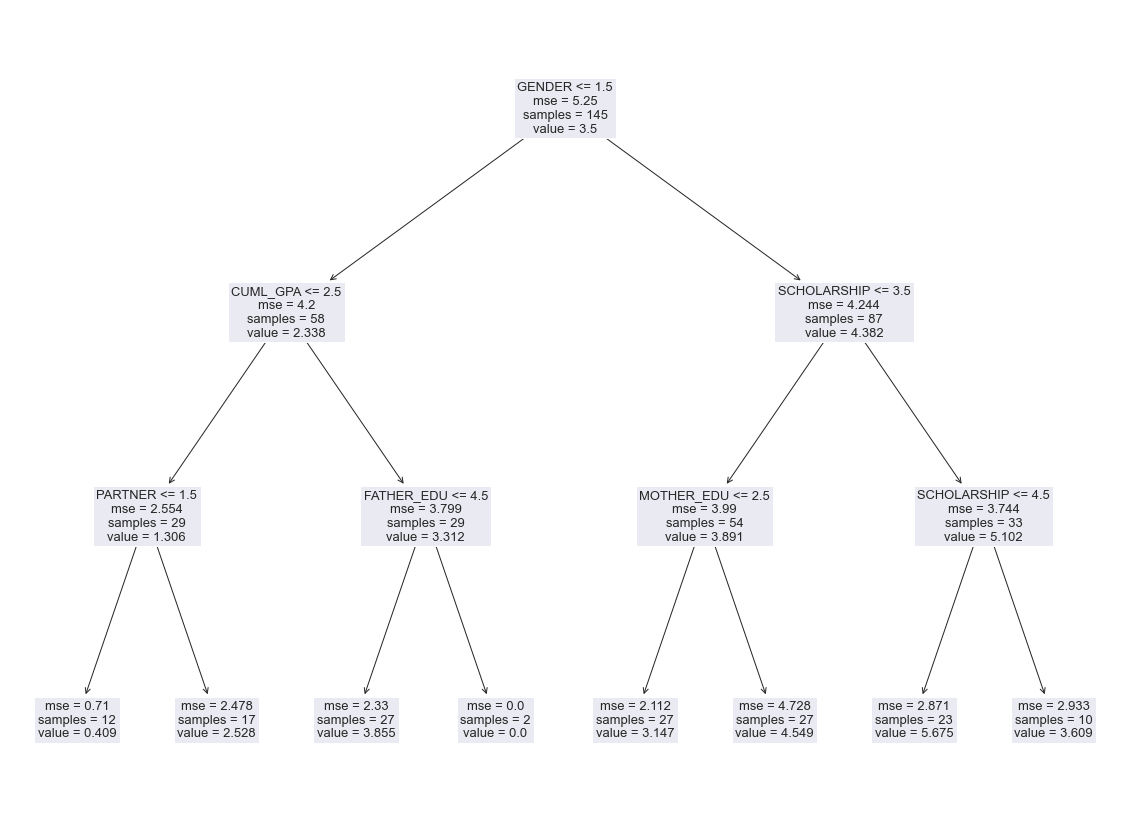

In [109]:
max_depth = 3
x_feat_list = df_ord_bin.columns[:-1]
y_feat = 'GRADE'

# extract values
x = df_students.loc[:, x_feat_list].values
y = df_students.loc[:, y_feat].values

# initialize random forest regressor
dec_tree_regress = tree.DecisionTreeRegressor(max_depth=max_depth)

# fit data
dec_tree_regress.fit(x, y, sample_weight = weight_list)

# initialize empty figure 
plt.figure()
plt.gcf().set_size_inches(20, 15)

# plot decision tree
tree.plot_tree(dec_tree_regress, 
               feature_names=x_feat_list);

In [117]:
max_depth = 3
y_feat = 'GRADE'
    
x_feat_list = df_students.columns[:-1]

# extract values
x = df_students.loc[:, x_feat_list].values
y = df_students.loc[:, y_feat].values 

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

# init random forest regressor
rf_reg = RandomForestRegressor(max_depth=max_depth)

kfold = KFold(n_splits= 10, shuffle = True)
for train_idx, test_idx in kfold.split(x, y):
    # cross validate: split data into train & test
    
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    x_test = x[test_idx, :]
    
    new_weight = list()
    for idx in train_idx:
        new_weight.append(weight_list[idx])
    
    rf_reg.fit(x_train, y_train, sample_weight = new_weight)
    
    y_pred[test_idx] = rf_reg.predict(x_test)

r2 = r2_score(y_pred=y_pred, y_true=y)

r2

0.08409852646609695

In [118]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in R^2 across all Decision Trees)')


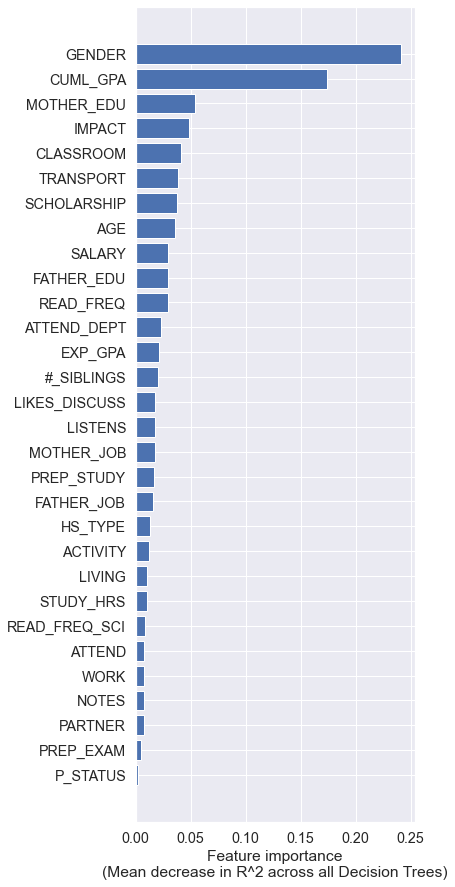

In [120]:
import seaborn as sns

sns.set(font_scale=1.3)

rf_reg.fit(x, y, sample_weight = weight_list)
plot_feat_import(x_feat_list, rf_reg.feature_importances_)


### k-NN classifer
to encompass all features., better suit the categorical features measured, cross validated to create a better predictative model for a new student - maybe no k-NN classifier, scale normalized (show covariance) 

#### All Categories

In [48]:
# all categories 

k = 14
x_feat_list = df_students.columns[:-1]
y_feat = 'GRADE'

scaled = pd.DataFrame()
for feat in x_feat_list:
    scaled[feat] = df_students[feat]/df_students[feat].std()

x = scaled.loc[:, x_feat_list].values
y_true = df_students.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# initialize of kfold object
kfold =KFold(n_splits=5, shuffle = True)

# initialize an array of same shape and type as y
y_pred = np.empty_like(y)
for train_idx, test_idx in kfold.split(x, y):
    # split into train and test sets
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    x_test = x[test_idx, :]
    
    # fit classifier (on training set)
    knn_classifier.fit(x_train, y_train)
    
    # predict (on testing set)
    y_pred[test_idx] = knn_classifier.predict(x_test)

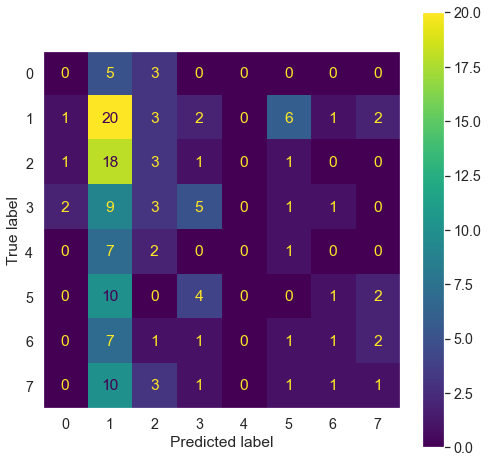

In [49]:
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

In [50]:
#intialize empty dict to store accuracy scores 
acc_dct = dict()

total_acc = accuracy_score(y_true, y_pred)
acc_dct['all features'] = total_acc

### k-NN optimization graph
guide the rest of the k-NN classifiers (keep consistent)

In [51]:
def get_cv_acc_knn(x, y_true, k, n_splits = 5):
    """ calculates the cross validated accuracy of k-NN on a given dataset
        
    Args:
        x(np.array): (n_sample, n_feat) features  
        y_true(np.array): (n_sample) variable
        k(int): number of nearest neighbors in k-NN classifier 
    
    Returns: 
        ac (float): cross validates accuracy
    
    """
  
    # initialize a knn_classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # construction of kfold object
    kfold = kfold = KFold(n_splits=5, shuffle = True)

    # allocate an empty array to store predictions in
    y_pred = np.empty(y.shape)

    for train_idx, test_idx in kfold.split(x, y_true):
        # build arrays which correspond to x, y train /test
        x_test = x[test_idx, :]
        x_train = x[train_idx, :]
        y_true_train = y_true[train_idx]


        # train on training data
        knn_classifier.fit(x_train, y_true_train)

        # predict on testing data
        y_pred[test_idx] = knn_classifier.predict(x_test)
        
    return accuracy_score(y_true, y_pred)

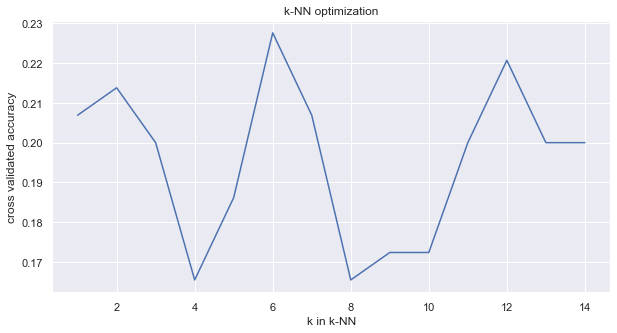

In [52]:
import seaborn as sns
sns.set()

# intialize lists for x and y values 
acc_y = list()

for i in range(1, 15):
    acc_y.append(get_cv_acc_knn(x, y_true, i))

# plot line graph 
plt.plot(range(1,15), acc_y)
plt.xlabel("k in k-NN")
plt.ylabel("cross validated accuracy")
plt.title("k-NN optimization")
plt.gcf().set_size_inches(10, 5)

In [18]:
# PERSONAL RELATED 
k = 5
x_feat_list = df_students.columns[:9]
y_feat = 'GRADE'

x = scaled.loc[:, x_feat_list].values
y_true = df_students.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# initialize of kfold object
kfold = KFold(n_splits=5, shuffle = True)

# initialize an array of same shape and type as y
y_pred = np.empty_like(y)
for train_idx, test_idx in kfold.split(x, y):
    # split into train and test sets
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    x_test = x[test_idx, :]
    
    # fit classifier (on training set)
    knn_classifier.fit(x_train, y_train)
    
    # predict (on testing set)
    y_pred[test_idx] = knn_classifier.predict(x_test)

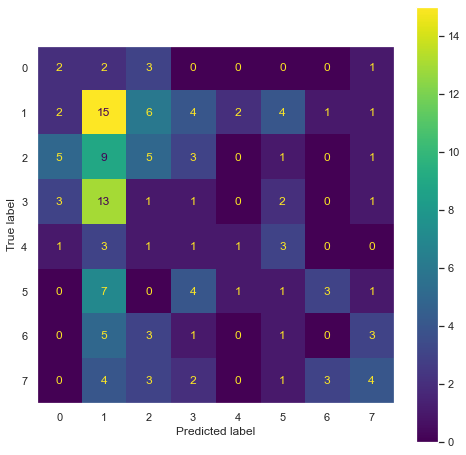

In [19]:
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()


plt.gcf().set_size_inches(8, 8)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

In [20]:
personal_acc = accuracy_score(y_true, y_pred)
acc_dct["personal"] = personal_acc

In [21]:
#FAMILY RELATED 
k = 5
x_feat_list = df_students.columns[10:16]
y_feat = 'GRADE'

x = scaled.loc[:, x_feat_list].values
y_true = df_students.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# initialize of kfold object
kfold = KFold(n_splits=5, shuffle = True)

# initialize an array of same shape and type as y
y_pred = np.empty_like(y)
for train_idx, test_idx in kfold.split(x, y):
    # split into train and test sets
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    x_test = x[test_idx, :]
    
    # fit classifier (on training set)
    knn_classifier.fit(x_train, y_train)
    
    # predict (on testing set)
    y_pred[test_idx] = knn_classifier.predict(x_test)

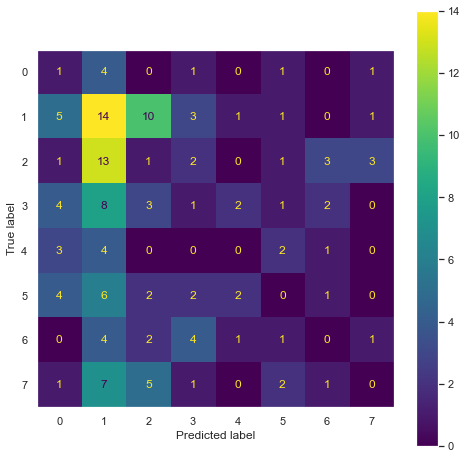

In [22]:
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

In [23]:
family_acc = accuracy_score(y_true, y_pred)
acc_dct["familal"] = family_acc

In [24]:
# EDUCATIONALLY RELATED 
k = 5
x_feat_list = df_students.columns[17:3]
y_feat = 'GRADE'

x = scaled.loc[:, x_feat_list].values
y_true = df_students.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# initialize of kfold object
kfold = KFold(n_splits=5, shuffle = True)

# initialize an array of same shape and type as y
y_pred = np.empty_like(y)
for train_idx, test_idx in kfold.split(x, y):
    # split into train and test sets
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    x_test = x[test_idx, :]
    
    # fit classifier (on training set)
    knn_classifier.fit(x_train, y_train)
    
    # predict (on testing set)
    y_pred[test_idx] = knn_classifier.predict(x_test)

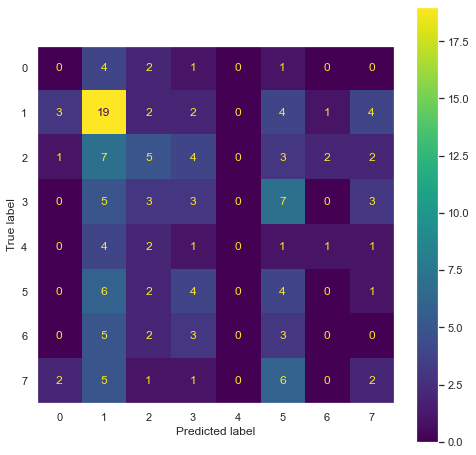

In [25]:
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

In [26]:
edu_acc = accuracy_score(y_true, y_pred)
acc_dct["education"] = edu_acc

Text(0, 0.5, 'Accuracy Score')

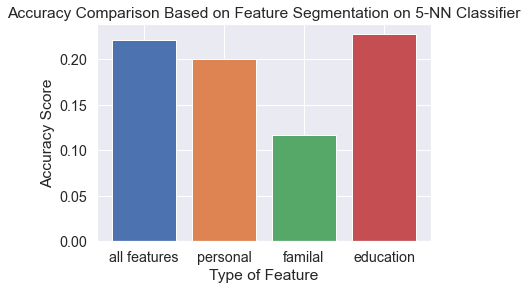

In [37]:
for k, v in acc_dct.items():
    plt.bar(k, v)

plt.title('Accuracy Comparison Based on Feature Segmentation on 5-NN Classifier')
plt.xlabel('Type of Feature')
plt.ylabel('Accuracy Score')

## Takeaways 

k-NN classifier does not have sample weight - more samples of 1?
most accurately classified grade
least accuraytely classified grade
how did the accuracy compare to the overal accuracy - bar graph (append accuracy_score to list)
